In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("final_test.csv")
df.head(10)

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
5,50,27.0,160.02,S
6,53,65.0,160.02,M
7,51,33.0,160.02,XXS
8,54,26.0,167.64,M
9,53,32.0,165.10,S


In [3]:
df.isnull().any()

weight    False
age        True
height     True
size      False
dtype: bool

In [4]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [5]:
df.dropna(how='any', inplace=True)
df.shape

(119153, 4)

In [6]:
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

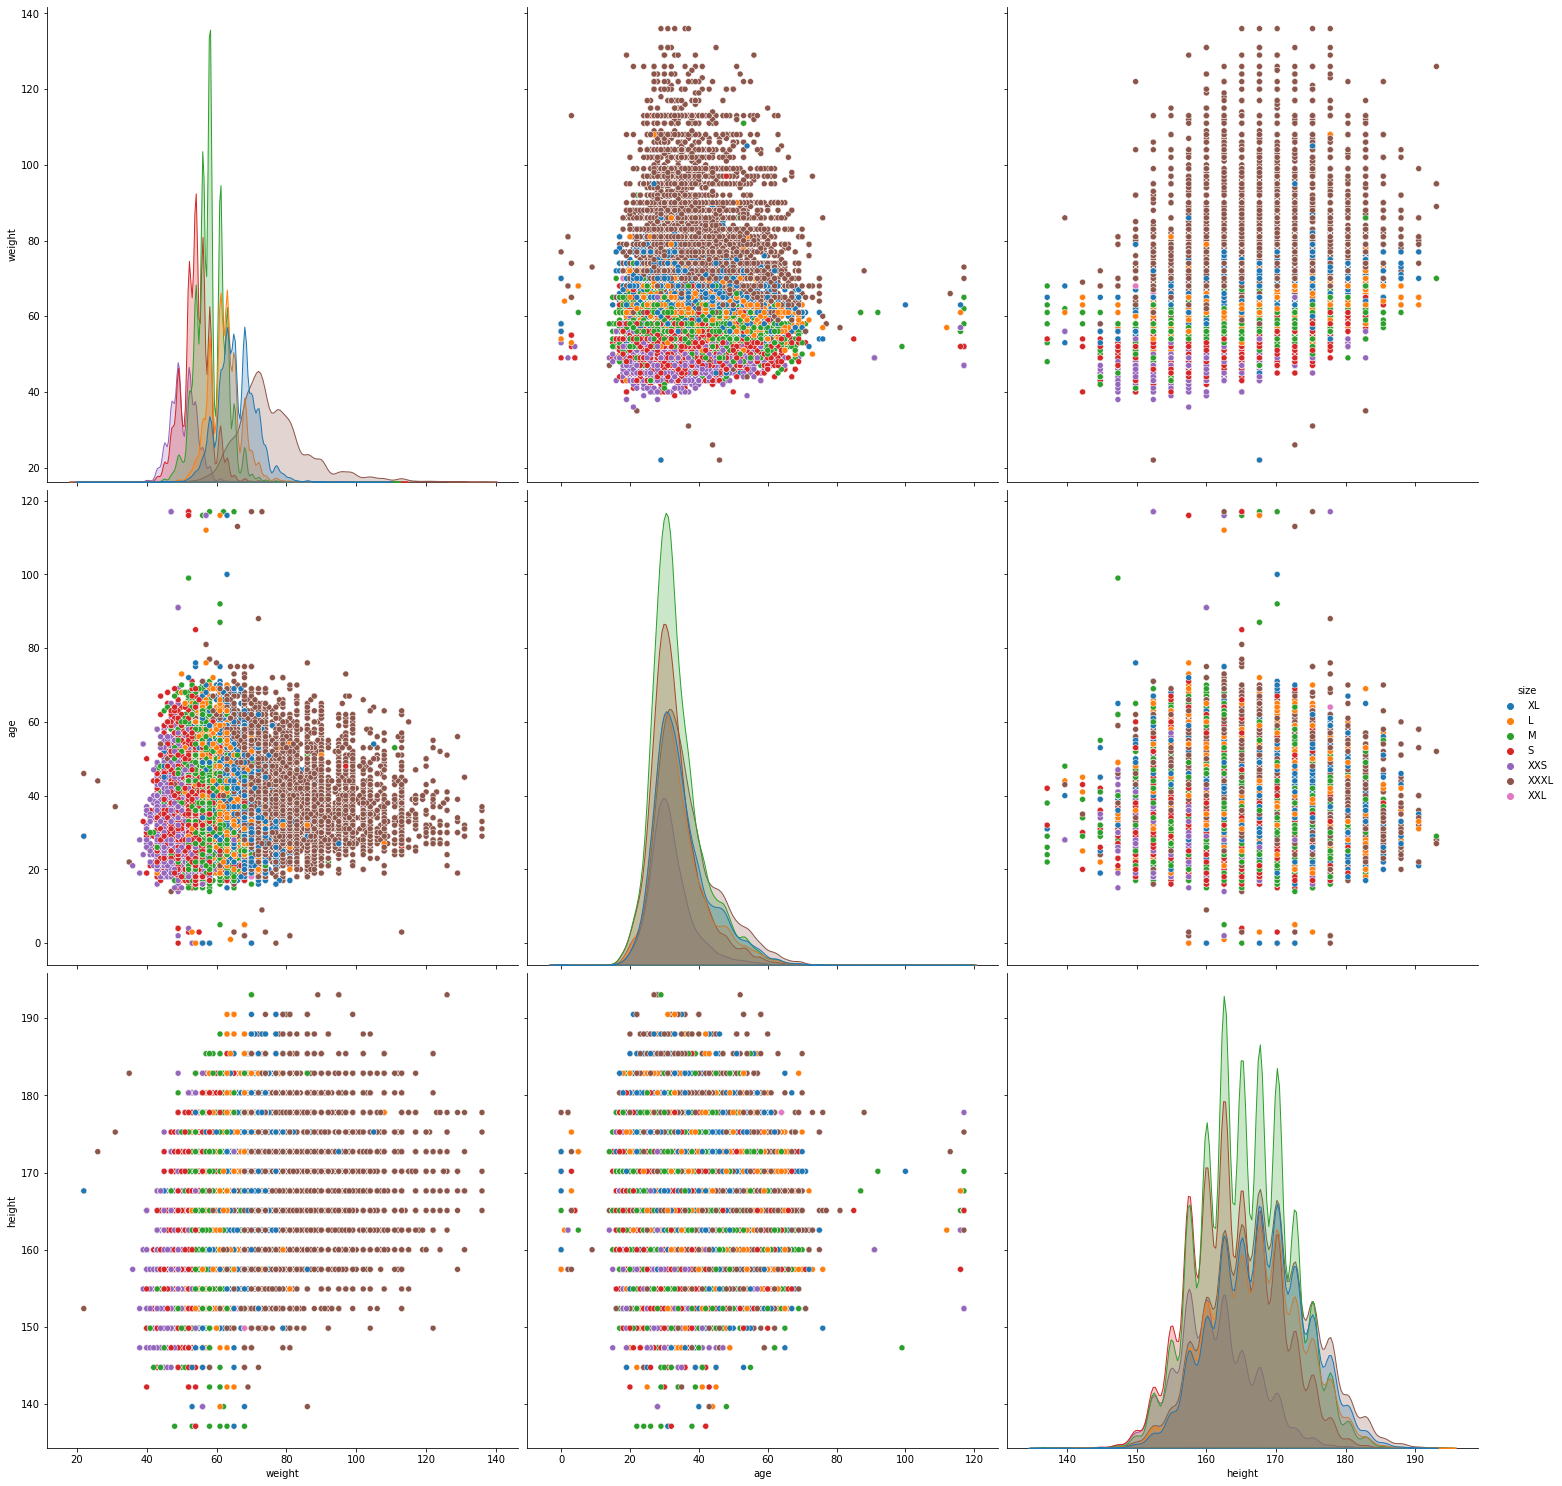

In [7]:
sns.pairplot(data=df, hue='size', height=7)
plt.show()

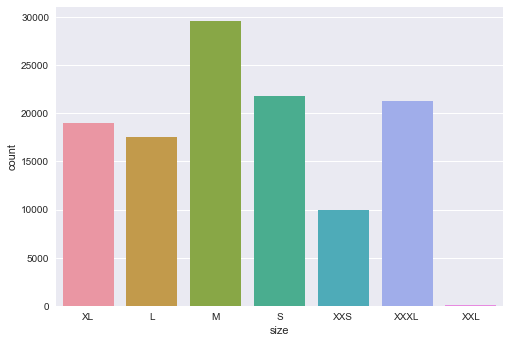

In [8]:
plt.style.use('seaborn')
sns.countplot(x=df['size'])
plt.show()

In [9]:
df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

Text(0.5, 1.0, 'height')

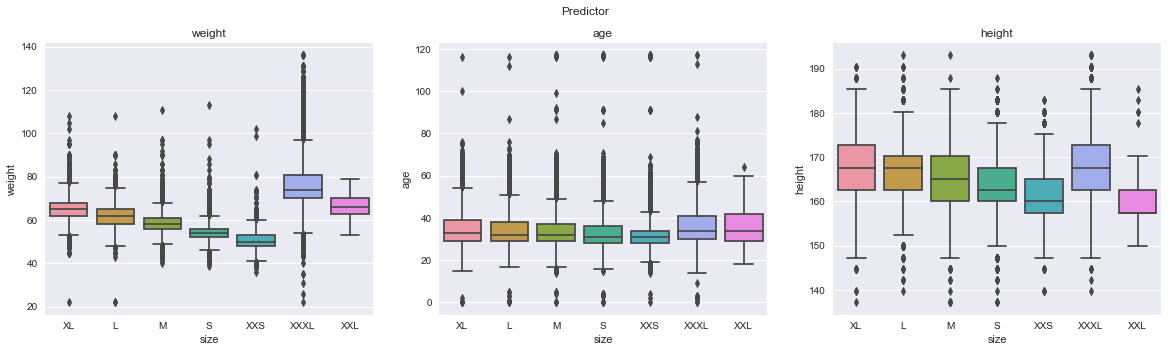

In [10]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Predictor')

# weight
sns.boxplot(x = 'size',y = 'weight', data = df, ax = axes[0])
axes[0].set_title('weight')

# age
sns.boxplot(x = 'size',y = 'age', data = df, ax = axes[1])
axes[1].set_title('age')

# height
sns.boxplot(x = 'size',y = 'height', data = df, ax = axes[2])
axes[2].set_title('height')

In [11]:
dfs = []
sizes = []
for size_type in df['size'].unique():
    print('size type:',size_type)
    sizes.append(size_type)
    ndf = df[['age','height','weight']][df['size'] == size_type]
    zscore = ((ndf - ndf.mean())/ndf.std())
    dfs.append(zscore)

size type: XL
size type: L
size type: M
size type: S
size type: XXS
size type: XXXL
size type: XXL


In [12]:
#Removing Outliers
for i in range(len(dfs)):
    print(sizes[i])
    dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age']>-3) & (dfs[i]['age']<3)]
    dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height']>-3) & (dfs[i]['height']<3)]
    dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight']>-3) & (dfs[i]['weight']<3)]

XL
L
M
S
XXS
XXXL
XXL


In [13]:
for i in range(len(sizes)):
    dfs[i]['size'] = sizes[i]

In [14]:
df1 = pd.concat(dfs)

In [15]:
df1.head(10)

,age,height,weight,size
0,-0.833765,0.767109,-0.660874,XL
24,-0.713753,1.539084,1.556823,XL
25,-0.353718,-1.162831,-0.291257,XL
28,-0.473729,-1.934807,-1.400106,XL
34,0.126330,-0.776843,0.447975,XL
52,-0.233706,-0.004867,-0.845682,XL
59,-0.233706,-1.548819,-1.400106,XL
60,-0.713753,-0.390855,-0.106449,XL
61,-0.953777,-0.004867,-1.030490,XL
63,-0.353718,1.153097,0.817591,XL


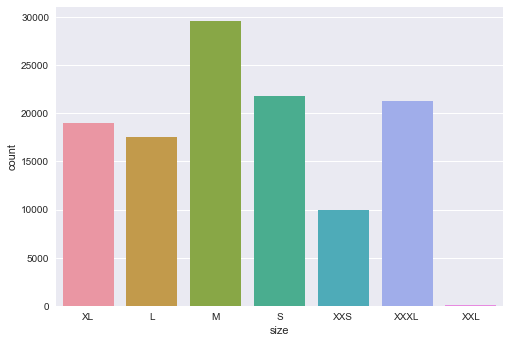

In [16]:
plt.style.use('seaborn')
sns.countplot(x=df1['size'])
plt.show()

In [17]:
df1['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

In [18]:
df2 = df1[df1['size'] != 'XXL'].copy()

In [19]:
df2.dropna(how='any', inplace=True)

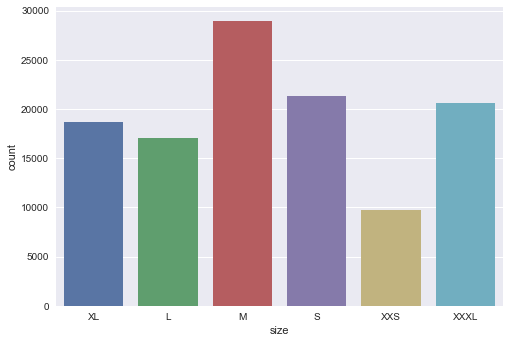

In [20]:
plt.style.use('seaborn')
sns.countplot(x=df2['size'])
plt.show()

In [21]:
size_code = {
    'XL':0,
    'L':1,
    'M':2,
    'S':3,
    'XXS':4,
    'XXXL':5
}
df2['size'].replace(size_code, inplace=True)

In [22]:
#Train - Test Split and Training
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
x, y = df2.drop('size', axis=1), df2['size']

In [23]:
x.shape,y.shape

((116366, 3), (116366,))

In [24]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.25)

In [25]:
x_train.shape

(87274, 3)

In [26]:
x_test.shape

(29092, 3)

<AxesSubplot:>

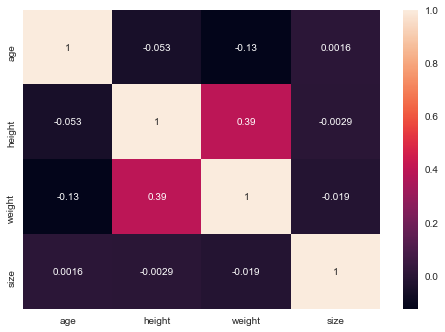

In [27]:
sns.heatmap(df2.corr(), annot=True)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [29]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier',
       'GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']

value = [LogisticRegression(solver='newton-cg'),KNeighborsClassifier(),SVC(C=.5, gamma = 0.1,kernel = 'rbf', random_state = 0),
         DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),xgb.XGBClassifier()]

models = dict(zip(key,value))

print(models)

{'LogisticRegression': LogisticRegression(solver='newton-cg'), 'KNeighborsClassifier': KNeighborsClassifier(), 'SVC': SVC(C=0.5, gamma=0.1, random_state=0), 'DecisionTreeClassifier': DecisionTreeClassifier(), 'RandomForestClassifier': RandomForestClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier(), 'AdaBoostClassifier': AdaBoostClassifier(), 'XGBClassifier': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, ve

In [30]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(x_train,y_train)
    predict = model.predict(x_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

C:\Users\home\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\home\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


LogisticRegression 0.2510312113295751
KNeighborsClassifier 0.815997525092809
SVC 0.25484669324900316
DecisionTreeClassifier 0.9998968788670425
RandomForestClassifier 0.998728172693524
GradientBoostingClassifier 0.9994843943352124
AdaBoostClassifier 0.5857967826206517


C:\Users\home\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 1.0


<AxesSubplot:>

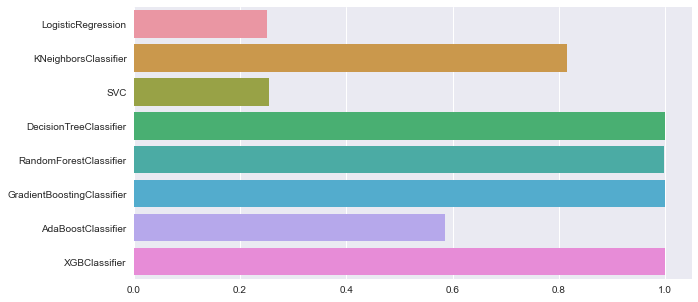

In [31]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key)